In [6]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func

In [7]:
# Create engine using the `earthquakes.sqlite` database file
engine = create_engine("sqlite:///real_estate.sqlite")

In [8]:
# Create the inspector and connect it to the engine
inspector= inspect(engine)

# Collect the names of tables within the database
tables= inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("-------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
print()

real_estate
-------
id INTEGER
date TEXT
price INTEGER
pricePerSquareFoot INTEGER
bedrooms INTEGER
bathrooms REAL
streetAddress TEXT
city TEXT
zipcode TEXT
latitude REAL
longitude REAL
yearBuilt INTEGER
livingArea INTEGER
parking BOOLEAN
garageSpaces INTEGER
pool BOOLEAN
spa BOOLEAN
isNewConstruction BOOLEAN
hasPetsAllowed BOOLEAN
homeType TEXT
county TEXT
event TEXT



In [9]:
conn = engine.connect()

In [10]:
# properties by ZIP code and their average price:
query = text("""SELECT 
                    city, 
                    AVG(price) AS average_price
                FROM 
                    real_estate
                GROUP BY 
                    city
                ORDER BY 
                    average_price DESC;""")
df1 = pd.read_sql(query, con=conn)
df1.head(10)

,city,average_price
0,MALIBU,3.950000e+07
1,Five Points,3.778000e+07
2,Tiburon,3.253200e+07
3,Crows Landing,2.037500e+07
4,Tipton,1.940000e+07
5,Summerland,1.482700e+07
6,Atherton,1.467154e+07
7,Pt. Reyes Station,1.238280e+07
8,Paicines,1.235250e+07
9,Woodside,1.228900e+07


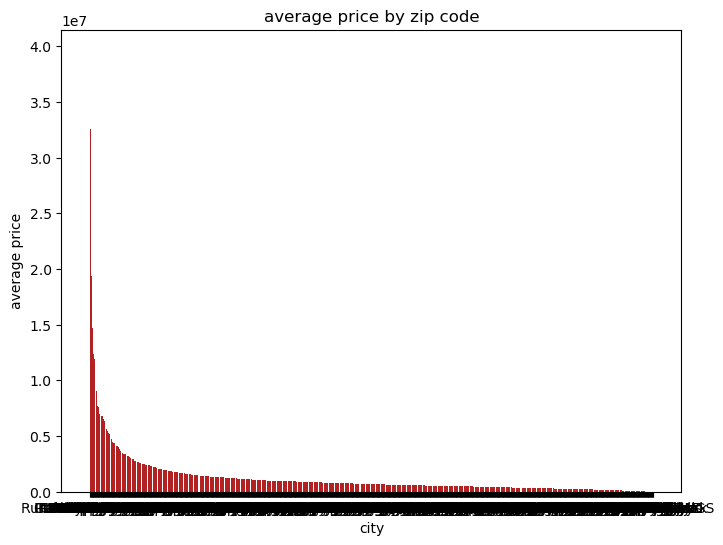

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(df1.city, df1.average_price, color="firebrick")
plt.title("average price by zip code")
plt.xlabel("city")
plt.ylabel("average price")
plt.show()

In [ ]:
# Raw SQL
query = text("""SELECT
                    city,
                    zipcode,
                    price,
                    bedrooms,
                    isNewConstruction,
                    homeType,
                    latitude,
                    longitude
                FROM
                    real_estate
                ORDER BY
                    city asc;""")
df2 = pd.read_sql(query, con=conn)
df2.head(10)

,city,zipcode,price,bedrooms,isNewConstruction,homeType,latitude,longitude
0,"""ONeals""",93645.0,760000,4,0,SINGLE_FAMILY,37.164665,-119.652451
1,29 Palms,92277.0,15500,0,0,LOT,34.175598,-116.032799
2,Acampo,95220.0,725000,3,0,SINGLE_FAMILY,38.192303,-121.321800
3,Acampo,95220.0,779000,0,0,LOT,38.199047,-121.247063
4,Acampo,95220.0,779000,3,0,SINGLE_FAMILY,38.214970,-121.278549
5,Acampo,95220.0,1325000,4,0,SINGLE_FAMILY,38.205585,-121.265656
6,Acampo,95220.0,949000,5,0,SINGLE_FAMILY,38.222935,-121.160835
7,Acampo,95220.0,1895000,4,1,SINGLE_FAMILY,38.172882,-121.265182
8,Acampo,95220.0,769000,3,0,SINGLE_FAMILY,38.216808,-121.144554
9,Acampo,95220.0,1277998,3,0,SINGLE_FAMILY,38.205402,-121.221458
